In [1]:
import graphlab

A newer version of GraphLab Create (v1.8.1) is available! Your current version is v1.7.1.

You can use pip to upgrade the graphlab-create package. For more information see https://dato.com/products/create/upgrade.


In [2]:
# Load some house value vs. crime rate data
# Dataset is from Philadelphia, PA and includes average house sales price in a number of neighborhoods. 
# The attributes of each neighborhood we have include the crime rate ('CrimeRate'), 
# miles from Center City ('MilesPhila'), town name ('Name'), and county name ('County').

In [3]:
sales = graphlab.SFrame.read_csv('Philadelphia_Crime_Rate_noNA.csv/')

[INFO] 1449230127 : INFO:     (initialize_globals_from_environment:282): Setting configuration variable GRAPHLAB_FILEIO_ALTERNATIVE_SSL_CERT_FILE to C:\Users\margrami\AppData\Local\Dato\Dato Launcher\lib\site-packages\certifi\cacert.pem
1449230127 : INFO:     (initialize_globals_from_environment:282): Setting configuration variable GRAPHLAB_FILEIO_ALTERNATIVE_SSL_CERT_DIR to 
This non-commercial license of GraphLab Create is assigned to margrami221@yahoo.com and will expire on October 13, 2016. For commercial licensing options, visit https://dato.com/buy/.

[INFO] Start server at: ipc:///tmp/graphlab_server-6280 - Server binary: C:\Users\margrami\AppData\Local\Dato\Dato Launcher\lib\site-packages\graphlab\unity_server.exe - Server log: C:\Users\margrami\AppData\Local\Temp\graphlab_server_1449230127.log.0
[INFO] GraphLab Server Version: 1.7.1


PROGRESS: Finished parsing file C:\Users\margrami\Regression\Philadelphia_Crime_Rate_noNA.csv
PROGRESS: Parsing completed. Parsed 99 lines in 0.026002 secs.
------------------------------------------------------
Inferred types from first line of file as 
column_type_hints=[long,float,float,float,float,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------
PROGRESS: Finished parsing file C:\Users\margrami\Regression\Philadelphia_Crime_Rate_noNA.csv
PROGRESS: Parsing completed. Parsed 99 lines in 0.012001 secs.


In [4]:
sales.head()

HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
124186,12.4186,19.5,25.0,8.0,Aston,Delaware
110490,11.049,49.4,25.0,2.7,Bensalem,Bucks
79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks
92634,9.2634,48.6,20.0,0.6,Bristol T.,Bucks
89246,8.9246,30.8,15.0,-2.6,Brookhaven,Delaware
195145,19.5145,10.8,20.0,-3.5,Bryn Athyn,Montgome
297342,29.7342,20.2,14.0,0.6,Bryn Mawr,Montgome
264298,26.4298,20.4,26.0,6.0,Buckingham,Bucks


# Exploring the data
The house price in a town is correlated with the crime rate of that town. Low crime towns tend to be associated with higher house prices and vice versa.

In [5]:
graphlab.canvas.set_target('ipynb')
sales.show(view="Scatter Plot", x="CrimeRate", y="HousePrice")

# Fit the regression model using crime as the feature¶

In [8]:
crime_model = graphlab.linear_regression.create(sales, target='HousePrice', features=['CrimeRate'], validation_set=None, verbose=False )


#Let's see what our fit looks like

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline #  % Modulus - Divides left hand operand by right hand operand and returns remainder

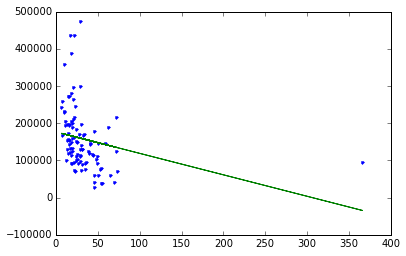

In [17]:
plt.plot(sales['CrimeRate'], sales['HousePrice'], '.', sales['CrimeRate'], crime_model.predict(sales), '-')

# Remove Center City and redo the analysis


In [ ]:
#Center city is influence a lot the data, because the crime rate is very high but the price is not low. it doesn't  follow the trend
# lets remove the Center City from the data:

In [20]:
# != Checks if the value of two operands are equal or not, if values are not equal then condition becomes true.
sales_noCC = sales[sales['MilesPhila'] != 0.0 ]

In [26]:
sales_noCC.show(view="Scatter Plot", x="CrimeRate", y="HousePrice")

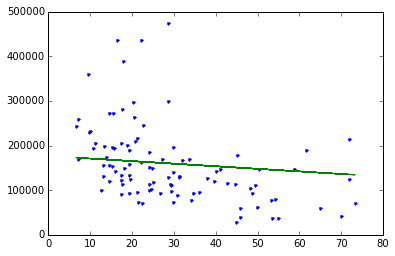

In [22]:
# let see what happens . This case is wrong .... 
plt.plot(sales_noCC['CrimeRate'], sales_noCC['HousePrice'], '.', sales_noCC['CrimeRate'], crime_model.predict(sales_noCC), '-')

In [23]:
# Well we can see it is not enough to remove data, you need again run the regression model to remove the influence of this out of trend
# data in the entire model
# Redo the analysis
crime_model_noCC = graphlab.linear_regression.create(sales_noCC, target='HousePrice', features=['CrimeRate'], validation_set=None, verbose=False )

# Look at the fit

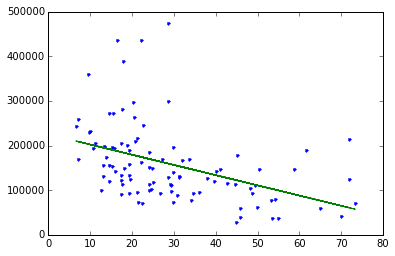

In [25]:
# This one is the properly way:
plt.plot(sales_noCC['CrimeRate'], sales_noCC['HousePrice'], '.', sales_noCC['CrimeRate'], crime_model_noCC.predict(sales_noCC), '-')

# Compare coefficients for full-data fit versus no-Center-City fit

In [28]:
crime_model.get('coefficients')

name,index,value
(intercept),None,176626.046881
CrimeRate,None,-576.804949058


In [30]:
crime_model_noCC.get('coefficients')

name,index,value
(intercept),None,225204.604303
CrimeRate,None,-2287.69717443


# Remove high-value outlier neighborhoods and redo analysis

In [ ]:
#Based on the discussion above, a question is whether the outlying high-value towns are strongly influencing the fit.
#Let's remove them and see what happens.

In [32]:
# sales[sales['MilesPhila'] != 0.0 ]
sales_noHighend = sales_noCC[sales_noCC['HousePrice'] < 350000]

In [34]:
crime_model_noHighend = graphlab.linear_regression.create(sales_noHighend, target='HousePrice', features=['CrimeRate'], validation_set=None)

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 93
PROGRESS: Number of features          : 1
PROGRESS: Number of unpacked features : 1
PROGRESS: Number of coefficients    : 2
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | 1         | 2        | 0.001000     | 153105.996748      | 54958.023447  |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: SUCCESS: Optimal solution found.
PROGRESS:


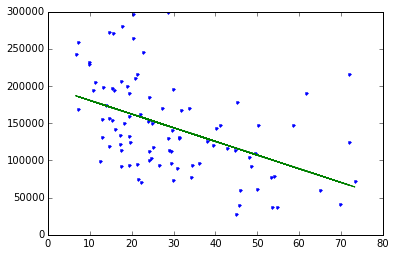

In [35]:
plt.plot(sales_noHighend['CrimeRate'], sales_noHighend['HousePrice'], '.', sales_noHighend['CrimeRate'], crime_model_noHighend.predict(sales_noHighend), '-')

In [37]:
crime_model_noHighend.get('coefficients')

name,index,value
(intercept),None,199073.589615
CrimeRate,None,-1837.71280989


In [38]:
-1837.71280989/-2287.69717443 # cambia un 20%

0.8033024783308055